# PyTorch WorkFlow
Let's explore a exercixe PyTorch end-to-end workflow.
Resources:
* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/
* Ground Truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb

In [219]:
what_we_are_covering = { 1: "data {prepare and load}",
                                          2 : "build model",
                                          3 : "fitting the model to data (training)",
                                          4 : "making predictions and evaluating a model (inference )",
                                          5 : "saving and loading the data",
                                          6 : "putting it all together"

}
what_we_are_covering

{1: 'data {prepare and load}',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference )',
 5: 'saving and loading the data',
 6: 'putting it all together'}

In [220]:
import torch
from torch import nn  # nn contains all of PyTorch building blocks for neural network
import matplotlib.pyplot as plt
import numpy as np

# Check PyTorch version
print(torch.__version__)

2.9.0+cu126


## 1. Data (Preparing and Loading)
Data can be almost anything .... in machine learning
* Excel spreadsheet
* Images of anykind
* Videos (YouTube has lots of data)
* Audio like songs and podcasts
* DNA
* Text
Machine learning is a game of two parts:
1. Get the data into  numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using the linear regression formula

We will use a linear regression formula to make a straight line with known **parameters**

In [221]:
# Create known paramters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[: 10], y[: 10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [222]:
len(X), len(y)

(50, 50)

### Splitting the data into training and test sets ( one of the most important concept in machine learning in general)
Intution:

**Course Materials (training set)**

**Practice Exam (validation set)**

**Final Exam (Test set)**

**Generalization:** The ability for a machine learning model to perform well on data it hasn't seen before.


In [223]:
train_split = int(0.8 * len(X))
train_split
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [224]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

How might we better visualize our data?

This is where the data explorer's motto comes in !

**Visualize, Visualize, Visualize**

In [225]:
def plot_predictions(train_data=X_train,
                                train_label=y_train,
                                test_data=X_test,
                                test_label=y_test,
                                predictions=None):
  """
  Plots training data, test data and compare predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_label, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_label, c="g", s=4, label="Testing data")

  # Are there predictions?
  if predictions is not None:

    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  # Show the legend
  plt.legend(prop={"size": 14});



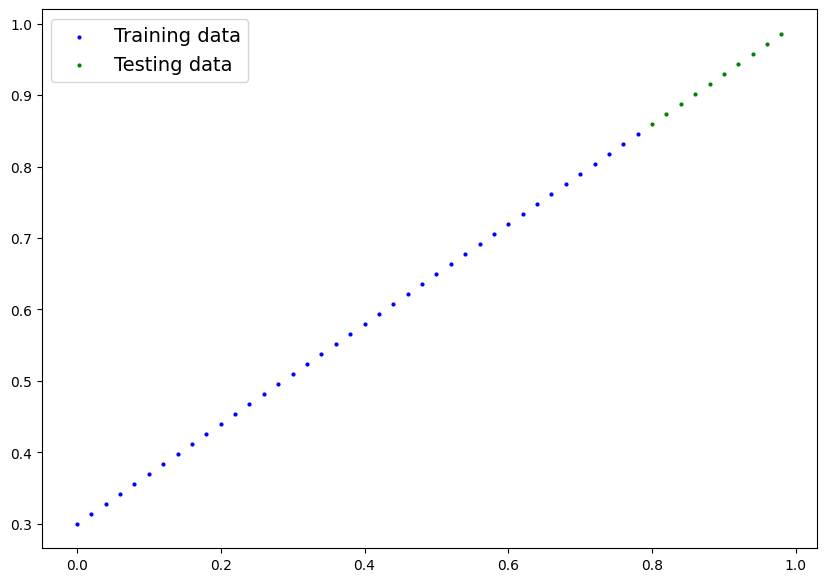

In [226]:
plot_predictions()

## 2. Build Model
Our first PyTorch model!

This is very exciting... let's build it

Because we are building **classes** throughout the course - https://docs.python.org/3/tutorial/classes.html

nn.Module - https://docs.pytorch.org/docs/stable/generated/torch.nn.Module.html

What our Model Does ?

* Start with random values(weight & bias)
* Look at training data and adjust the random values to better represent (or get closer) to the ideal values (the weight and bias we used to create the data)

How does it do so?

Through two main algorithms:

1. **Gradient  Descent** - https://youtu.be/IHZwWFHWa-w?si=ae0RrKLEUcQmLDjF
2. **Back Propogation** - https://youtu.be/Ilg3gGewQ5U?si=_KdHyAWnwRYDRTGa


In [227]:
# Create a Linear Regression model class:

class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
      def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float16))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float16))

        # Forward  method to define the computation in the model -
      def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
            return self.weights * x  +  self.bias   # this is the linear regression formula


###  PyTorch model building essentials
* `torch.nn`- contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* `torch.nn.Parameter` - what paramters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* `torch.nn.Module` - The base class for all neural networks modules, if you subclass it, you should overwrite forward()
* `torch.optim` - this is where the optimizers in PyTorch live, they will help with **gradient descent**
* `def forward() ` - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in forward computation

See more of these essentials modules via PyTorch cheatsheet - https://www.learnpytorch.io/pytorch_cheatsheet/

### Checking the contents of our PyTorch model
Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`

In [228]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module )
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], dtype=torch.float16, requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float16, requires_grad=True)]

In [229]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367], dtype=torch.float16)),
             ('bias', tensor([0.1288], dtype=torch.float16))])

In [230]:
weight, bias

(0.7, 0.3)

In [231]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

### Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it perdicts `y_test` based on `X_test`

When we pass data through our model , it's going to run it through `forward()` method.

In [232]:
# Make predictions with Model
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3981],
        [0.4049],
        [0.4116],
        [0.4183],
        [0.4251],
        [0.4318],
        [0.4385],
        [0.4453],
        [0.4520],
        [0.4587]])

In [233]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

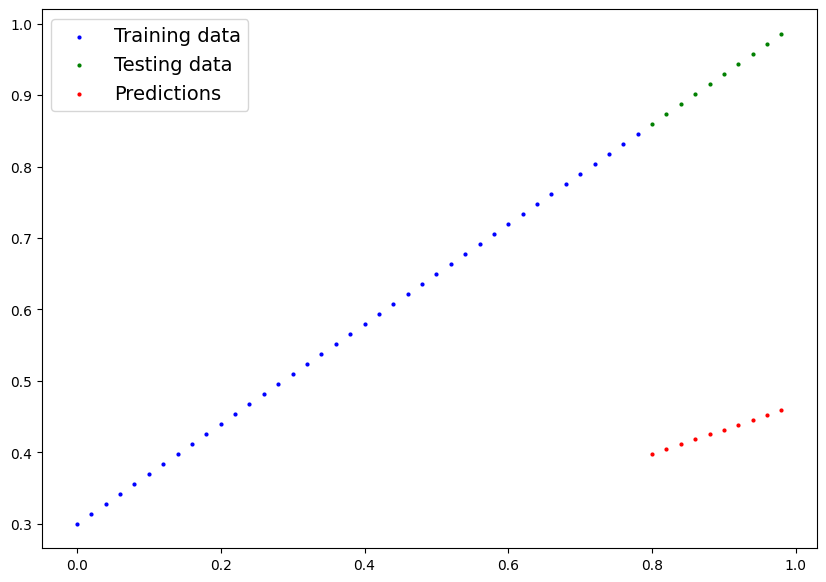

In [234]:
plot_predictions(predictions=y_preds)

## 3. Train Model
The whole idea of training is for a model to move from some **unknown** parameters (these may be random) to some known parameters

Or in other words from a poor representation of the data to better representation of the data
* Note : Loss function may also be called cost function or criterion in different areas, we are going to refer Loss Function

One way to measure how poor or how wrong your models predictions are is to use the loss function. - https://docs.pytorch.org/docs/stable/nn.html#loss-functions

Things we need to train:

* **Loss Function:** - A function to measure how  wrong your model's predictions are to the ideal output, **lower is better**
* **Optimizers** - Takes into account the loss function of a model amd adjusts the model's parameters  (e.g. weight & biases) to improve the loss function. - https://docs.pytorch.org/docs/stable/optim.html

And specifically for PyTorch, we need:
* **A training loop**
* **A testing loop**

In [235]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], dtype=torch.float16, requires_grad=True),
 Parameter containing:
 tensor([0.1288], dtype=torch.float16, requires_grad=True)]

In [236]:
print(f"These are the initialized params :\n {model_0.state_dict()}")

These are the initialized params :
 OrderedDict({'weights': tensor([0.3367], dtype=torch.float16), 'bias': tensor([0.1288], dtype=torch.float16)})


In [237]:
# Setup a Loss Function
loss_fn = nn.L1Loss()
#Setup an optimizer (stochastic gradient descent)
optimizer  = torch.optim.SGD(params=model_0.parameters(),
                                              lr=0.01) # lr - learning rate = possibly the most important hyperparameter we set as a Data Scientist

### Building a training loop ( and a testing loop) in PyTorch

A couples of things we need in a training loop:

0. Loop through the data
1. forward pass (this involves data moving our model's `forward()` functions ) to make prediction on data also called Forward propogation
2. Calculate Loss (compare forward pass predictions to ground truth labels )
3.  Optimizer zero grad
4. Loss backward - moves backward through the network to calculate the gradient of each parameters of our model with respect to the loss (**backpropogation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve  the loss (**gradinet descent**)

In [238]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367], dtype=torch.float16)),
             ('bias', tensor([0.1288], dtype=torch.float16))])

In [239]:
# An epoch is one loop through the data ... (this is an hyperparamter because we've set it to ourselves)
epochs = 200

## Training

epoch_count = []
loss_values = []
test_loss_values = []
# 0. Loop thorugh the data
for epoch in  range(epochs):

  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that requires gradient

  # 1. Forward Pass
  y_pred = model_0(X_train)

  # 2. Calculate a loss
  loss = loss_fn(y_pred, y_train)
  #print(f"Loss : \n {loss}")

  # 3. Optimize zero grad
  optimizer.zero_grad()

  # 4. Perform backprop on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()   # by default how the optimizer changes will accumulate through loop so... we have to zero them above in step 3 for the next iteration of the loop

  # Testing
  model_0.eval() # turns off different settings in the model not needed in evaluation/testing
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 10 == 0:

    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch : {epoch} | Loss : {loss} | Test Loss : {test_loss}")

    #Print our model dict
    print(f"Updated weights : \n {model_0.state_dict()}")



Epoch : 0 | Loss : 0.31291455030441284 | Test Loss : 0.48109325766563416
Updated weights : 
 OrderedDict({'weights': tensor([0.3406], dtype=torch.float16), 'bias': tensor([0.1388], dtype=torch.float16)})
Epoch : 10 | Loss : 0.19758251309394836 | Test Loss : 0.3462299704551697
Updated weights : 
 OrderedDict({'weights': tensor([0.3796], dtype=torch.float16), 'bias': tensor([0.2389], dtype=torch.float16)})
Epoch : 20 | Loss : 0.08893213421106339 | Test Loss : 0.21685989201068878
Updated weights : 
 OrderedDict({'weights': tensor([0.4187], dtype=torch.float16), 'bias': tensor([0.3335], dtype=torch.float16)})
Epoch : 30 | Loss : 0.05304492637515068 | Test Loss : 0.1443134844303131
Updated weights : 
 OrderedDict({'weights': tensor([0.4517], dtype=torch.float16), 'bias': tensor([0.3767], dtype=torch.float16)})
Epoch : 40 | Loss : 0.04537109658122063 | Test Loss : 0.11368848383426666
Updated weights : 
 OrderedDict({'weights': tensor([0.4751], dtype=torch.float16), 'bias': tensor([0.3865], d

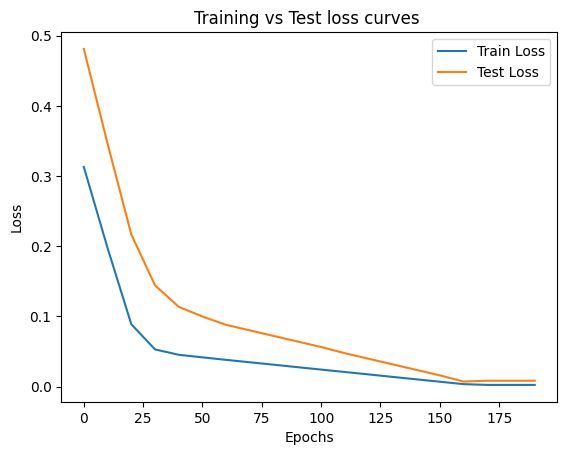

In [240]:
# Plot the  loss
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train Loss")
plt.plot(epoch_count, test_loss_values, label="Test Loss")
plt.title("Training vs Test loss curves ")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()


In [241]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)


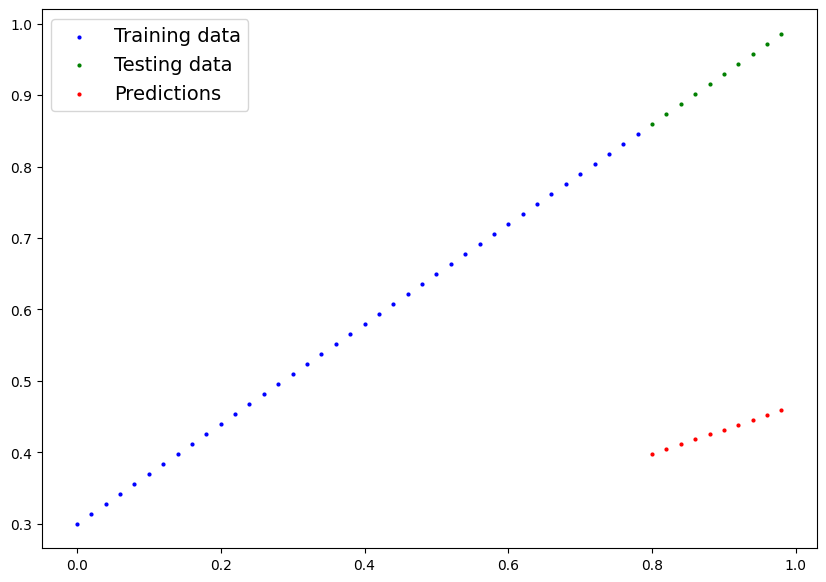

In [242]:
plot_predictions(predictions=y_preds)

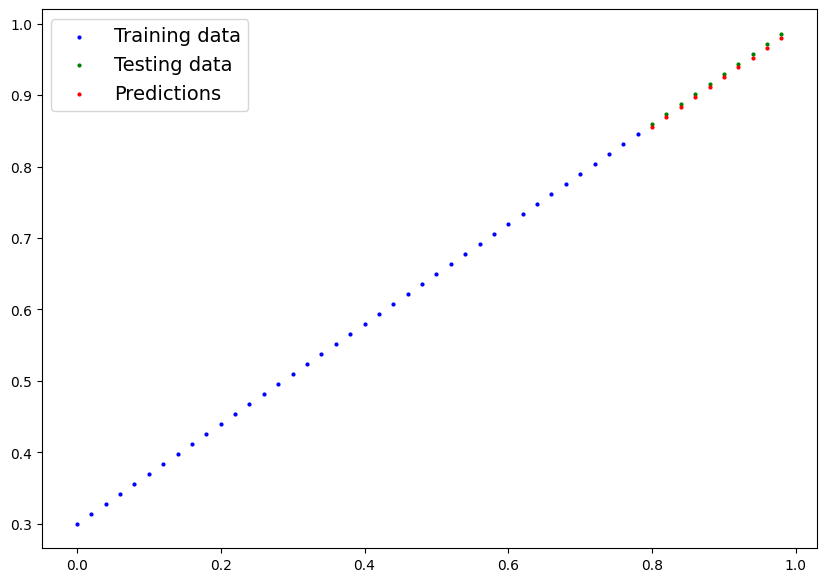

In [243]:
plot_predictions(predictions=y_preds_new)

In [244]:
weight, bias

(0.7, 0.3)

In [245]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6948], dtype=torch.float16)),
             ('bias', tensor([0.2996], dtype=torch.float16))])

## Saving a Model in PyTorch

There are three main methods you should know about for saving and loading models in PyTorch.

1. `torch.save()` - allows you save a PyTorch object in pickle format.
2. `torch.load()` - allows you load a saved PyTorch object.
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

Refer to this - https://docs.pytorch.org/tutorials/beginner/saving_loading_models.html

In [246]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6948], dtype=torch.float16)),
             ('bias', tensor([0.2996], dtype=torch.float16))])

In [248]:
# Saving our PyTorch model
from pathlib import Path

# 1. Creates models Directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model state_dict()
print(f"Saving Model to: {MODEL_SAVE_PATH}")
torch.save(obj = model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving Model to: models/01_pytorch_workflow_model_0.pth


In [251]:
! ls  -l models

total 4
-rw-r--r-- 1 root root 2117 Dec 10 03:04 01_pytorch_workflow_model_0.pth


## Loading a PyTorch model
Since we saved our model's `state_dict()` rather than entire model. we will create a new instance of our model class and load the saved `state_dict()`

In [252]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6948], dtype=torch.float16)),
             ('bias', tensor([0.2996], dtype=torch.float16))])

In [256]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved static_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [257]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6948], dtype=torch.float16)),
             ('bias', tensor([0.2996], dtype=torch.float16))])

In [258]:
# Make some predictions
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [262]:
# Make some model preds
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [263]:
# Compare loaded model preds with original model preds

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])